In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [17]:
df = pd.read_csv('faults.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [19]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


<Axes: xlabel='X_Minimum', ylabel='Y_Minimum'>

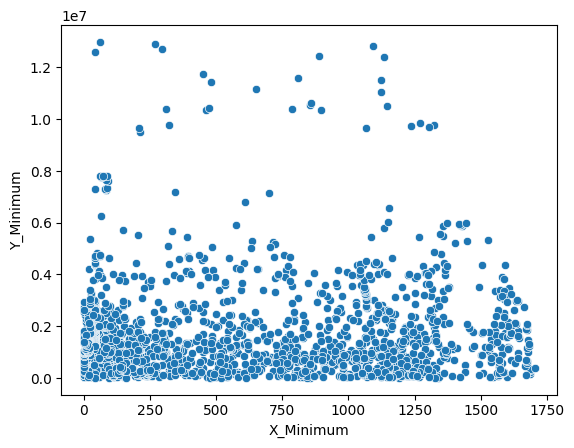

In [20]:
sns.scatterplot(x='X_Minimum',y='Y_Minimum',data=df)

In [21]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [22]:
df_onehot = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

In [23]:
df['defect_type'] = df_onehot.idxmax(axis=1)

<Axes: xlabel='count', ylabel='defect_type'>

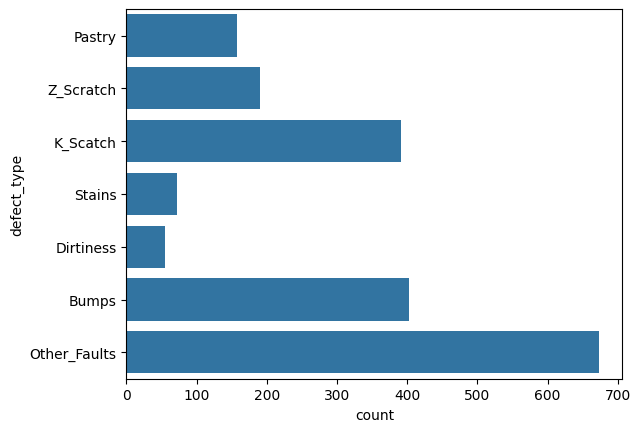

In [24]:
sns.countplot(df['defect_type'])

In [25]:
X = df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults','defect_type'],axis=1)

In [26]:
y= df['defect_type']

In [27]:
df['TypeOfSteel_A300']

0       1
1       1
2       1
3       0
4       0
       ..
1936    0
1937    0
1938    0
1939    0
1940    1
Name: TypeOfSteel_A300, Length: 1941, dtype: int64

#simple code without any cleaning

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train,y_train)

c:\Users\DDP Engineering\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
pred = model.predict(X_test)

In [34]:
accuracy_score(y_test,pred)

0.45241809672386896

In [35]:
confusion_matrix(y_test,pred)

array([[ 71,   0,   3,  43,   0,   0,   0],
       [ 10,   0,   2,   5,   0,   0,   0],
       [  3,   0, 110,  22,   0,   0,   0],
       [ 88,   0,  41, 109,   0,   0,   0],
       [ 22,   0,   5,  15,   0,   0,   0],
       [ 22,   0,   0,   2,   0,   0,   0],
       [ 25,   0,   3,  40,   0,   0,   0]])

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Bumps       0.29      0.61      0.40       117
   Dirtiness       0.00      0.00      0.00        17
    K_Scatch       0.67      0.81      0.74       135
Other_Faults       0.46      0.46      0.46       238
      Pastry       0.00      0.00      0.00        42
      Stains       0.00      0.00      0.00        24
   Z_Scratch       0.00      0.00      0.00        68

    accuracy                           0.45       641
   macro avg       0.20      0.27      0.23       641
weighted avg       0.37      0.45      0.40       641



c:\Users\DDP Engineering\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DDP Engineering\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DDP Engineering\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

<Axes: xlabel='Steel_Plate_Thickness', ylabel='defect_type'>

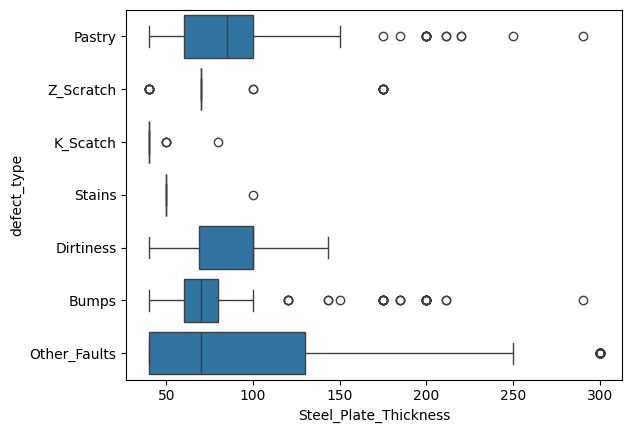

In [ ]:
sns.boxplot(data=df,y='defect_type',x='Steel_Plate_Thickness')

<Axes: xlabel='Steel_Plate_Thickness', ylabel='Density'>

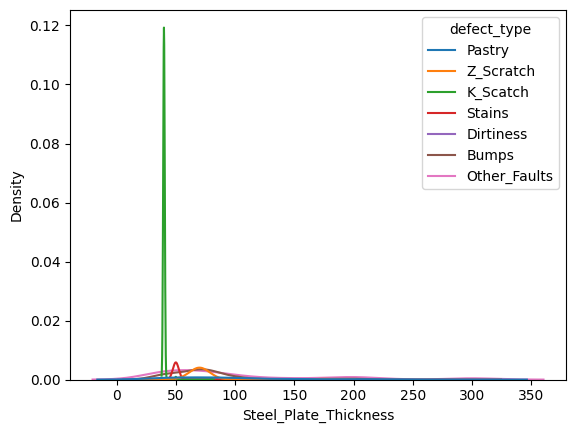

In [47]:
sns.kdeplot(data=df,hue='defect_type',x='Steel_Plate_Thickness')

<Axes: xlabel='Steel_Plate_Thickness', ylabel='Count'>

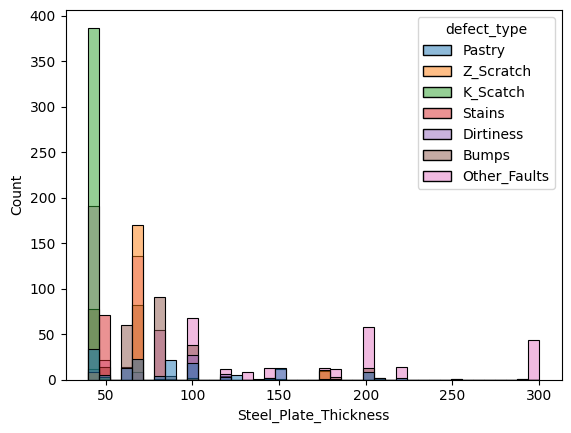

In [50]:
sns.histplot(data=df,x='Steel_Plate_Thickness',hue='defect_type')